1. We will start by connecting to Kaggle using Kaggle API which can be downloaded from your kaggle account's settings and uploading it to Colab

In [ ]:
# 1 run this cell and select kaggle.json file download form the a kaggle account settings pages
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"dermotkeaney","key":"9657a6ed70685537f780768013d27606"}'}

2. Installing kaggle api using pip


In [ ]:
# Next install the kaggle API client
!pip install -q kaggle


3. Installing kaggle api using pip

In [ ]:
# The Kaggle API client expects this file to be in  ~/.kaggle,so move it there
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change aviods a warning on Kaggle tool startup
!chmod 600 ~/.kaggle/kaggle.json

4. To store the data we will create a new directory and make it as current working directory

In [ ]:
# Creating directory and changing the current working directory
!mkdir traffic_sign_dataset
%cd traffic_sign_dataset

/content/traffic_sign_dataset


5. Searching Kaggle for the required dataset using search option(-s) with title 'gtsrb-german-traffic-sign

In [ ]:
# Searching for dataset

!kaggle datasets list -s gtsrb-german-traffic-sign

ref                                                                title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
meowmeowmeowmeowmeow/gtsrb-german-traffic-sign                     GTSRB - German Traffic Sign Recognition Benchmark  612MB  2018-11-25 18:12:34          99558       1061  0.8235294        
valentynsichkar/traffic-signs-preprocessed                         Traffic Signs Preprocessed                           4GB  2019-08-31 18:22:11          13035        277  1.0              
harbhajansingh21/german-traffic-sign-dataset                       German Traffic Sign Dataset                        118MB  2023-07-11 04:21:24            499         30  1.0              
ibrahimkaratas/gtsrb-german-traffic-sign-recogniti

6. After searching the data next step would be downloading the data into collab notebook using references found in search option

In [ ]:
#Downloading dataset and coming out of directory

!kaggle datasets download meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
%cd ..

100% 612M/612M [00:34<00:00, 23.1MB/s]
100% 612M/612M [00:34<00:00, 18.5MB/s]
/content


7. We will unzip the data which is downloaded and remove the irrelevant files

In [ ]:
# Unzipping downloaded file and removing the ususable file
!unzip traffic_sign_dataset/gtsrb-german-traffic-sign.zip -d traffic_sign_dataset
!rm traffic_sign_dataset/gtsrb-german-traffic-sign.zip
#!rm -rf traffic_sign_dataset/Meta
#!rm -rf traffic_sign_dataset/meta
#!rm -rf traffic_sign_dataset/test
#!rm -rf traffic_sign_dataset/train
#!rm traffic_sign_dataset/Meta.csv

Streaming output truncated to the last 5000 lines.
  inflating: traffic_sign_dataset/train/5/00005_00053_00010.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00011.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00012.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00013.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00014.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00015.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00016.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00017.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00018.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00019.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00020.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00021.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00022.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00023.png  
  inflating: traffic_sign

8. Visualizing some images of traffic sign from the test dataset. we can see here that the dimension of images are uneven.


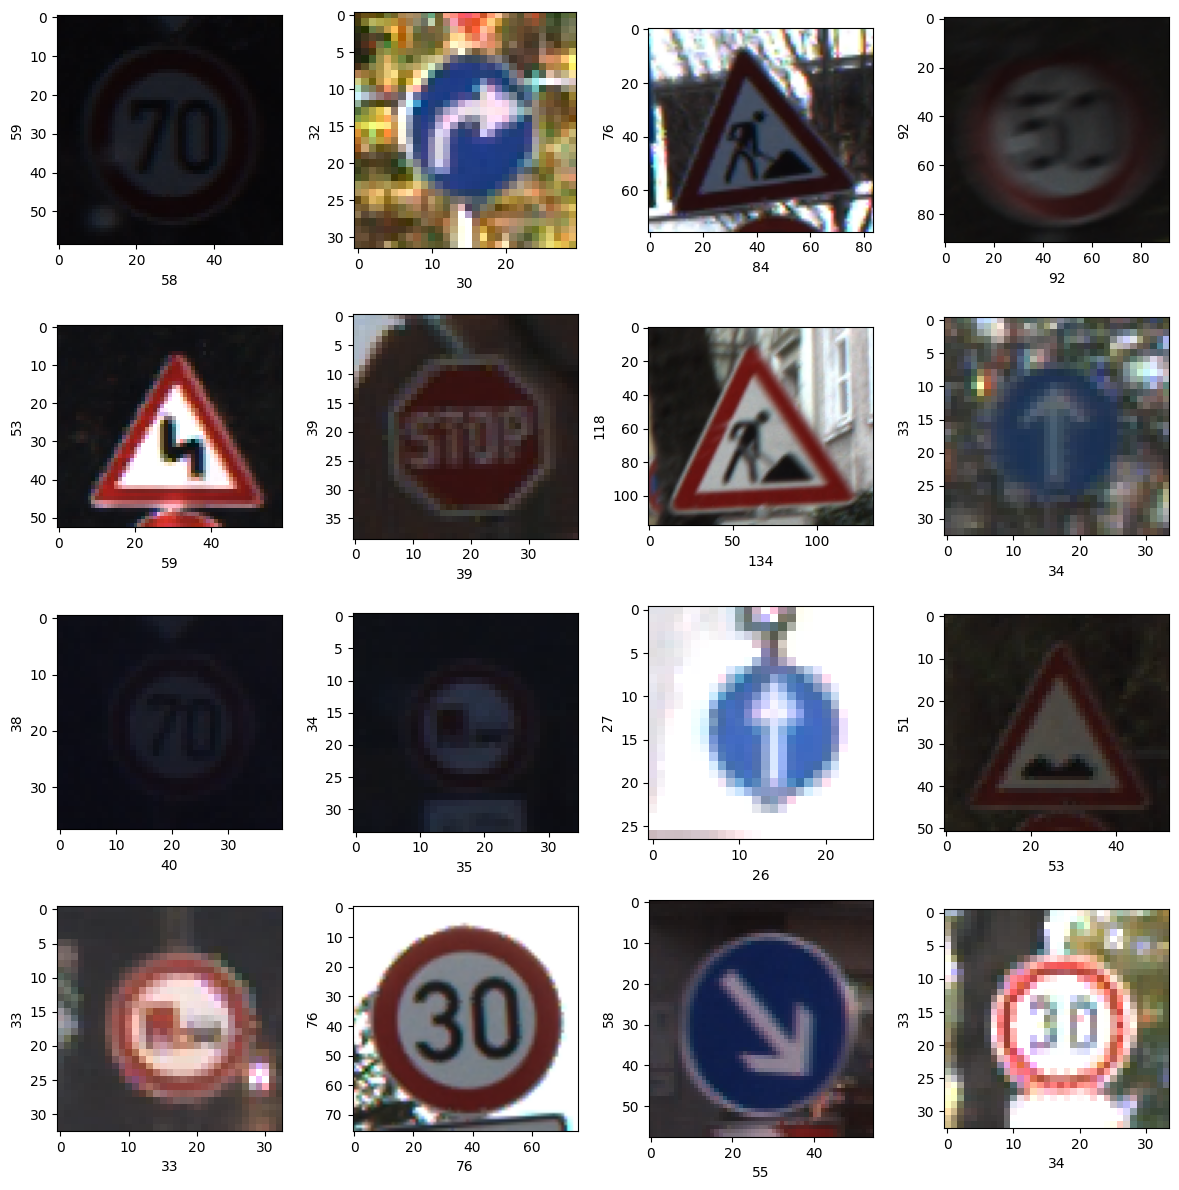

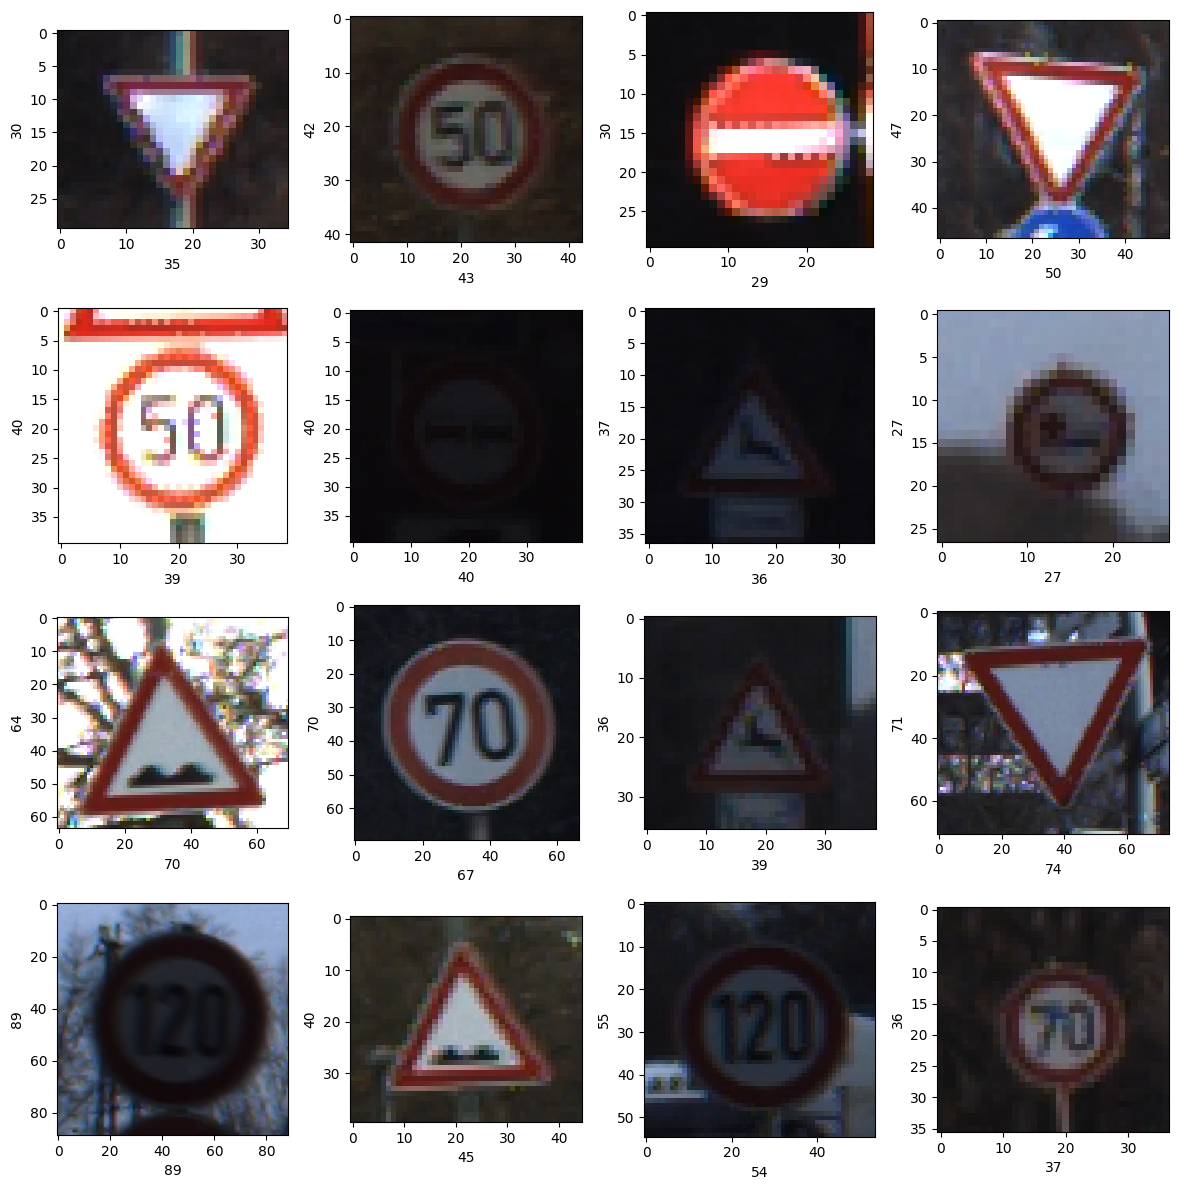

In [ ]:
import os
import matplotlib.pyplot as plt
from matplotlib.image import imread
import random

# Plotting 12 images to check dataset
plt.figure(figsize=(12,12))
path = "traffic_sign_dataset/Test"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10)#height of image


# Plotting 12 images to check dataset
plt.figure(figsize=(12,12))
path = "traffic_sign_dataset/Test"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10)#height of image

    #check out the image quality. Images have uneven dimensions

9. For further processing we will require the images of same dimension. So, we will start storing the dimension of all the images from training dataset from all 43 classes.

In [ ]:

# check the dimensions size of the images
dim1 = []
dim2 = []

for i in range(0,43):
    labels = 'traffic_sign_dataset/Train' + '/{0}'.format(i)
    image_path = os.listdir(labels)
    for x in image_path:
        img = imread(labels + '/' + x)
        dim1.append(img.shape[0])
        dim2.append(img.shape[1])

10. Now we will find out the mean value of both the dimensions and analyse them. Here, we can see that (50,50) is the average shape for all the images.

In [ ]:
import numpy as np

#Printing mean dimension of images
print("Dimension 1 Mean : ",np.mean(dim1), " Dimension 2 Mean : ",np.mean(dim2))

Dimension 1 Mean :  50.328929582493814  Dimension 2 Mean :  50.83587951745773


Adjust the resolution size to 224 x 224 for VGG16

In [ ]:
from PIL import Image

# Now we will reshape the images to (224,224)
images = []
label_id = []

for i in range(43):
    labels = 'traffic_sign_dataset/Train' + '/{0}'.format(i)
    image_path = os.listdir(labels)
    for x in image_path:
        img = Image.open(labels + '/' + x)
        img = img.resize((224,224))
        img = np.array(img)
        images.append(img)
        label_id.append(i)

The number of classes will be reduced to 10 to allow for online processing given limited GPU availability

Create two new folders to hold training and validation datasets

In [ ]:
!mkdir traffic_sign_dataset/training/
!mkdir traffic_sign_dataset/validation/

Create folders for each class in the training and validation directories

In [ ]:
!mkdir traffic_sign_dataset/training/0
!mkdir traffic_sign_dataset/training/1
!mkdir traffic_sign_dataset/training/2
!mkdir traffic_sign_dataset/training/3
!mkdir traffic_sign_dataset/training/4
!mkdir traffic_sign_dataset/training/5
!mkdir traffic_sign_dataset/training/6
!mkdir traffic_sign_dataset/training/7
!mkdir traffic_sign_dataset/training/8
!mkdir traffic_sign_dataset/training/9

!mkdir traffic_sign_dataset/validation/0
!mkdir traffic_sign_dataset/validation/1
!mkdir traffic_sign_dataset/validation/2
!mkdir traffic_sign_dataset/validation/3
!mkdir traffic_sign_dataset/validation/4
!mkdir traffic_sign_dataset/validation/5
!mkdir traffic_sign_dataset/validation/6
!mkdir traffic_sign_dataset/validation/7
!mkdir traffic_sign_dataset/validation/8
!mkdir traffic_sign_dataset/validation/9

Reduce the number of
classes in the main dataset to 10

In [ ]:
!rm -rf /content/traffic_sign_dataset/train/43
!rm -rf /content/traffic_sign_dataset/train/42
!rm -rf /content/traffic_sign_dataset/train/41
!rm -rf /content/traffic_sign_dataset/train/40
!rm -rf /content/traffic_sign_dataset/train/39
!rm -rf /content/traffic_sign_dataset/train/38
!rm -rf /content/traffic_sign_dataset/train/37
!rm -rf /content/traffic_sign_dataset/train/36
!rm -rf /content/traffic_sign_dataset/train/35
!rm -rf /content/traffic_sign_dataset/train/34
!rm -rf /content/traffic_sign_dataset/train/33
!rm -rf /content/traffic_sign_dataset/train/32
!rm -rf /content/traffic_sign_dataset/train/31
!rm -rf /content/traffic_sign_dataset/train/30
!rm -rf /content/traffic_sign_dataset/train/29
!rm -rf /content/traffic_sign_dataset/train/28
!rm -rf /content/traffic_sign_dataset/train/27
!rm -rf /content/traffic_sign_dataset/train/26
!rm -rf /content/traffic_sign_dataset/train/25
!rm -rf /content/traffic_sign_dataset/train/24
!rm -rf /content/traffic_sign_dataset/train/23
!rm -rf /content/traffic_sign_dataset/train/22
!rm -rf /content/traffic_sign_dataset/train/21
!rm -rf /content/traffic_sign_dataset/train/20
!rm -rf /content/traffic_sign_dataset/train/19
!rm -rf /content/traffic_sign_dataset/train/18
!rm -rf /content/traffic_sign_dataset/train/17
!rm -rf /content/traffic_sign_dataset/train/16
!rm -rf /content/traffic_sign_dataset/train/15
!rm -rf /content/traffic_sign_dataset/train/14
!rm -rf /content/traffic_sign_dataset/train/13
!rm -rf /content/traffic_sign_dataset/train/12
!rm -rf /content/traffic_sign_dataset/train/11
!rm -rf /content/traffic_sign_dataset/train/10

#reduce the number classes to 10

Validate the remaining classes in the train dataset

In [ ]:
ls /content/traffic_sign_dataset/train/

0/  1/  2/  3/  4/  5/  6/  7/  8/  9/


Split the datasets for each class into the training and validation datasets

In [ ]:
import os
from sklearn.model_selection import train_test_split
from collections import defaultdict
import shutil

dataset_dir = '/content/traffic_sign_dataset/train/'
train_dir = '/content/traffic_sign_dataset/training/'
val_dir = '/content/traffic_sign_dataset/validation/'

# Create directories for training and validation if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# Dictionary to store images for each class
class_images = defaultdict(list)

# Collect images for each class
for class_name in os.listdir(dataset_dir):
    class_dir = os.path.join(dataset_dir, class_name)
    if os.path.isdir(class_dir):
        images = [os.path.join(class_dir, img) for img in os.listdir(class_dir)]
        class_images[class_name].extend(images)

# Split images for each class into training and validation sets
for class_name, images in class_images.items():
    train_images, val_images = train_test_split(images, test_size=0.2, random_state=42)

    # Move images to the respective directories for training and validation
    for img in train_images:
        shutil.copy(img, os.path.join(train_dir, class_name, os.path.basename(img)))
    for img in val_images:
        shutil.copy(img, os.path.join(val_dir, class_name, os.path.basename(img)))

Check the structure of the training and validation directories




In [ ]:
ls /content/traffic_sign_dataset/validation/

0/  1/  2/  3/  4/  5/  6/  7/  8/  9/


In [ ]:
ls /content/traffic_sign_dataset/training/

0/  1/  2/  3/  4/  5/  6/  7/  8/  9/


Review the class structure and images

In [ ]:
# How many images in each folder?
import os

# Walk through traffic_sign_dataset directory and list number of files
for dirpath, dirnames, filenames in os.walk("traffic_sign_dataset"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 8 directories and 3 images in 'traffic_sign_dataset'.
There are 0 directories and 45 images in 'traffic_sign_dataset/Meta'.
There are 0 directories and 12631 images in 'traffic_sign_dataset/test'.
There are 0 directories and 12631 images in 'traffic_sign_dataset/Test'.
There are 10 directories and 0 images in 'traffic_sign_dataset/validation'.
There are 0 directories and 396 images in 'traffic_sign_dataset/validation/4'.
There are 0 directories and 294 images in 'traffic_sign_dataset/validation/9'.
There are 0 directories and 450 images in 'traffic_sign_dataset/validation/2'.
There are 0 directories and 288 images in 'traffic_sign_dataset/validation/7'.
There are 0 directories and 42 images in 'traffic_sign_dataset/validation/0'.
There are 0 directories and 84 images in 'traffic_sign_dataset/validation/6'.
There are 0 directories and 444 images in 'traffic_sign_dataset/validation/1'.
There are 0 directories and 282 images in 'traffic_sign_dataset/validation/8'.
There are 0 di

Setup the data inputs for the transfer learning model,
Scale and normalise the datasets. The resolution of each image has to be changed to 224x224 for VGG16 modelling



In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SHAPE = (224, 224)
BATCH_SIZE = 32

train_dir = "/content/traffic_sign_dataset/training/"
test_dir = "/content/traffic_sign_dataset/validation/"

# Setup data inputs with scaling and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255.,  # Scale pixel values to the range [0, 1]
    featurewise_center=True,  # Center the pixel values to have zero mean
    featurewise_std_normalization=True,  # Normalize the pixel values to have unit variance
    horizontal_flip=True,  # Randomly flip images horizontally
    rotation_range=20,  # Randomly rotate images by up to 20 degrees
    width_shift_range=0.2,  # Randomly shift images horizontally by up to 20% of the width
    height_shift_range=0.2,  # Randomly shift images vertically by up to 20% of the height
    zoom_range=0.2  # Randomly zoom into images by up to 20%
)

test_datagen = ImageDataGenerator(rescale=1./255.)

print("Training images:")
training_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMAGE_SHAPE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

print("Validation images:")
validation_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMAGE_SHAPE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)


Training images:
Found 11736 images belonging to 10 classes.
Validation images:
Found 2934 images belonging to 10 classes.


Add the pretrained VGG16 model


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load the VGG16 model with pre-trained ImageNet weights (excluding the top FC layers)
vgg = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the pre-trained layers
for layer in vgg.layers:
    layer.trainable = False

# Add custom classification layers
x = Flatten()(vgg.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense('10', activation='softmax')(x)  # Replace num_classes with the number of traffic sign classes

# Create a new model by combining VGG16 base and custom classification layers
model = Model(inputs=vgg.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

58889256/58889256 [==============================] - 4s 0us/step


In [ ]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

Run the model against training and validation kera data generators

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

BATCH_SIZE = 32

# Number of epochs
NUM_EPOCHS = 10

# Define data augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=False,
    fill_mode='nearest')

# Validation data should not be augmented
val_datagen = ImageDataGenerator(rescale=1./255)

# Set up the train and validation generators
train_generator = train_datagen.flow_from_directory(
    '/content/traffic_sign_dataset/training/',
    target_size=(224, 224),
    batch_size= BATCH_SIZE,
    class_mode='categorical')

val_generator = val_datagen.flow_from_directory(
    '/content/traffic_sign_dataset/validation/',
    target_size=(224, 224),
    batch_size= BATCH_SIZE,
    class_mode='categorical')

# Train the model
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=NUM_EPOCHS,
    validation_data=val_generator,
    validation_steps=val_generator.samples // BATCH_SIZE)

Found 11736 images belonging to 10 classes.
Found 2934 images belonging to 10 classes.
Epoch 1/10
366/366 [==============================] - 197s 511ms/step - loss: 1.6824 - accuracy: 0.3934 - val_loss: 1.3543 - val_accuracy: 0.5481
Epoch 2/10
366/366 [==============================] - 185s 504ms/step - loss: 1.2764 - accuracy: 0.5500 - val_loss: 1.0598 - val_accuracy: 0.6576
Epoch 3/10
366/366 [==============================] - 185s 506ms/step - loss: 1.0935 - accuracy: 0.6141 - val_loss: 0.9064 - val_accuracy: 0.7445
Epoch 4/10
366/366 [==============================] - 176s 480ms/step - loss: 0.9705 - accuracy: 0.6620 - val_loss: 0.8961 - val_accuracy: 0.6841
Epoch 5/10
366/366 [==============================] - 175s 478ms/step - loss: 0.8928 - accuracy: 0.6894 - val_loss: 0.7746 - val_accuracy: 0.7709
Epoch 6/10
366/366 [==============================] - 177s 483ms/step - loss: 0.8315 - accuracy: 0.7103 - val_loss: 0.7027 - val_accuracy: 0.7699
Epoch 7/10
366/366 [=================

Assess the performance of the model

<Axes: >

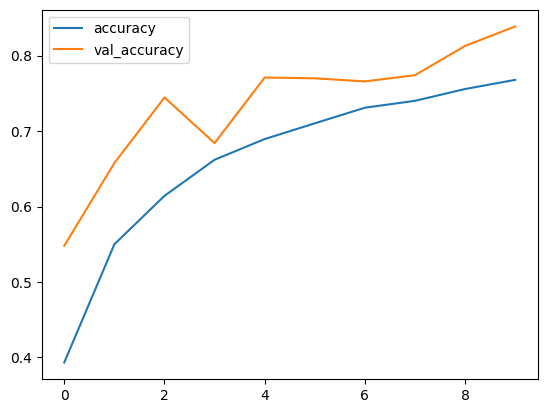

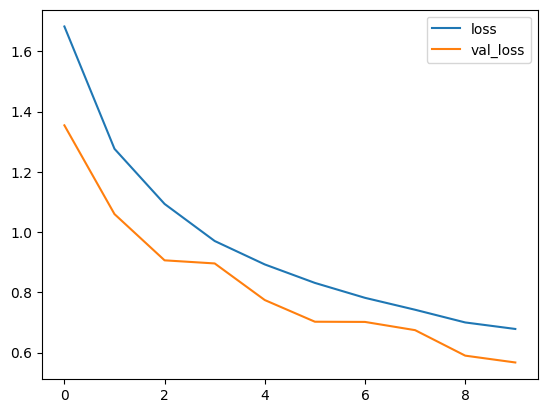

In [ ]:
import pandas as pd

evaluation = pd.DataFrame(model.history.history)
evaluation[['accuracy', 'val_accuracy']].plot()
evaluation[['loss', 'val_loss']].plot()

In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

Predictions will be carried out on the test data set. Creating the variable which has path of test dataset. As we downloded the dataset we found out that their is a GT-final_test.csv file in the test images folder which cannot be processed. So, we will remove that file.

In [ ]:
test_path = 'traffic_sign_dataset/Test'
!rm traffic_sign_dataset/Test/GT-final_test.csv

Next step would we creating a function to resize the test images converting them into a numpy array and normalize them.

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np
import os

def preprocess_images_vgg16(image_paths):
    images = []
    for img_path in image_paths:
        img = image.load_img(img_path, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = preprocess_input(img_array)
        images.append(img_array)
    return np.vstack(images)


test_path = 'traffic_sign_dataset/Test'

test_images = [os.path.join(test_path, img_name) for img_name in sorted(os.listdir(test_path))]

scaled_test_images = preprocess_images_vgg16(test_images)


Check the test image shape

In [ ]:
scaled_test_images.shape

(12630, 224, 224, 3)

Next we will read label ids from Test.csv and store the values of the class id in y_test variable.

In [ ]:
test = pd.read_csv('traffic_sign_dataset/Test.csv')
y_test = test['ClassId'].values
y_test

array([16,  1, 38, ...,  6,  7, 10])

Now we will use the model to make predictions on our test images and save them in y_pred.

In [ ]:
y_pred_probabilities = model.predict(scaled_test_images)
y_pred_classes = y_pred_probabilities.argmax(axis=-1)

395/395 [==============================] - 10s 24ms/step


Storing the labels according to the image classes.

In [ ]:
# Storing all labels
all_labels = ['Speed limit (20km/h)','Speed limit (30km/h)','Speed limit (50km/h)','Speed limit (60km/h)',
              'Speed limit (70km/h)','Speed limit (80km/h)','End of speed limit (80km/h)','Speed limit (100km/h)',
              'Speed limit (120km/h)']


Let's visualize test image

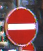

In [ ]:
from PIL import Image

# Visualize test image
img = Image.open(test_path + '/01000.png')
img


Finding out original label for the image above.

In [ ]:
# Original label
print("Original label : ",all_labels[y_test[1000]])

Original label :  No entry


Finding out the predicted label for the image above.

In [ ]:
# Predicted label
print("Predicted label : ",all_labels[y_pred_classes[1000]])

Predicted label :  Speed limit (60km/h)


Conclusion

The model was able to predict the image was a traffic sign. Further tuning may improve the accuracy of the predictions.